In [1]:
import numpy as np
from PIL import Image
import torch

In [2]:
from dataset import CustomImageDataset
from torchvision.transforms import Resize

full_ds = CustomImageDataset(list(range(400)), transform=Resize(size=(224,224)))

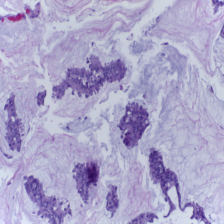

In [3]:
for x in range(1):
    image = full_ds[x][0]
    display(image)

In [4]:
# Load model directly
from transformers import AutoImageProcessor, AutoModel

processor = AutoImageProcessor.from_pretrained("owkin/phikon-v2")
model = AutoModel.from_pretrained("owkin/phikon-v2")

/home/aschieb/.cache/pypoetry/virtualenvs/interview-9R0srsGm-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model.eval()


for i,(x,_) in enumerate(full_ds):
    # Process the image
    inputs = processor(image, return_tensors="pt")
    print(inputs)
    # Get the features
    with torch.inference_mode():
        outputs = model(**inputs)
        features = outputs.last_hidden_state[:, 0, :]  # (1, 1024) shape


{'pixel_values': tensor([[[[ 1.0502,  1.2214,  1.2899,  ...,  1.0844,  1.1529,  0.8447],
          [ 1.0673,  1.1187,  1.1872,  ..., -0.1314,  0.7762,  0.6563],
          [ 1.1529,  1.0502,  1.0331,  ..., -0.7137,  0.0056,  0.1597],
          ...,
          [ 1.5639,  1.5468,  1.6324,  ...,  1.6495,  1.5639,  1.5297],
          [ 1.5468,  1.5297,  1.6495,  ...,  1.6153,  1.5639,  1.5297],
          [ 1.6153,  1.5125,  1.6324,  ...,  1.5639,  1.4954,  1.4440]],

         [[ 1.1155,  1.3081,  1.3957,  ...,  1.2206,  1.2381,  0.8880],
          [ 1.1681,  1.2206,  1.3256,  ..., -0.1450,  0.8704,  0.6429],
          [ 1.2556,  1.1856,  1.1506,  ..., -0.9853, -0.1625, -0.0399],
          ...,
          [ 1.7633,  1.7808,  1.8508,  ...,  1.8859,  1.8333,  1.7283],
          [ 1.8333,  1.7458,  1.8683,  ...,  1.9034,  1.7808,  1.7283],
          [ 1.9209,  1.7458,  1.8333,  ...,  1.8333,  1.7108,  1.6057]],

         [[ 2.0648,  2.1346,  2.1520,  ...,  2.1171,  2.1171,  1.7511],
          [ 2

In [6]:
features

tensor([[ 0.2847,  0.1038,  0.1134,  ..., -0.0284, -0.0199, -0.0958]])